In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.offline as po

In [2]:
#read in latest info from https://github.com/datasets/covid-19
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
#create population column for later
df["Population"] = np.NaN
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Population
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,NaN
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,NaN
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,NaN
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,NaN
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,NaN


In [3]:
ref = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/reference.csv")
ref.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [6]:
# df[(df["Country/Region"] == "China") & (df["Province/State"].isnull())]
# ref[(ref["Country_Region"] == "China") & (ref["Province_State"].isnull())]
tmp = df[df.Date == df.Date.max()].copy()[["Country/Region","Province/State"]]
data = set()
df2 = df.copy()
df2["UID"] = np.NaN
df2["iso2"] = np.NaN
df2["iso3"] = np.NaN
df2["code3"] = np.NaN
df2["FIPS"] = np.NaN
df2["Combined_Key"] = df2["Province/State"].astype(str) + "," + df2["Country/Region"].astype(str)
for row in tmp.itertuples():
    if row[2] is np.NaN:
        uid,iso2,iso3,code3,fips,pop = ref[(ref["Country_Region"] == row[1])][["UID","iso2","iso3","code3","FIPS","Population"]].values[0]
        df2.loc[df2["Country/Region"] == row[1],["UID","iso2","iso3","code3","FIPS","Population"]] = [uid,iso2,iso3,code3,fips,pop]
    else:
        try:
            uid,iso2,iso3,code3,fips,pop = ref[(ref["Country_Region"] == row[1]) & (ref["Province_State"] == row[2])][["UID","iso2","iso3","code3","FIPS","Population"]].values[0]
            df2.loc[(df2["Country/Region"] == row[1]) & (df2["Province/State"] == row[2]),["UID","iso2","iso3","code3","FIPS","Population"]] = [uid,iso2,iso3,code3,fips,pop]
        except:
            continue
df2[(df2.Population.isnull()) & (df2.Date == df2.Date.max())]
df2.drop(df2[(df2["Country/Region"] == "Diamond Princess") | (df2["Province/State"] == "Diamond Princess") ].index,axis=0,inplace=True)
df2.drop(df2[(df2["Country/Region"] == "MS Zaandam") | (df2["Province/State"] == "Grand Princess") ].index,axis=0,inplace=True)
df2[(df2.Population.isnull()) & (df2.Date == df2.Date.max())]

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,iso2,iso3,code3,FIPS,Combined_Key
4523,2020-04-17,Canada,Recovery aggregated,56.1304,-106.3468,NaN,10545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Recovery aggregated,Canada"


In [7]:
df2.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,iso2,iso3,code3,FIPS,Combined_Key
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,AF,AFG,4.0,NaN,"nan,Afghanistan"
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,AF,AFG,4.0,NaN,"nan,Afghanistan"
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,AF,AFG,4.0,NaN,"nan,Afghanistan"
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,AF,AFG,4.0,NaN,"nan,Afghanistan"
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,AF,AFG,4.0,NaN,"nan,Afghanistan"


In [8]:
#add usa data
usc = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/us_confirmed.csv")
usd = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/us_deaths.csv")
usc["Population"] = usd.Population
usc.rename(columns={"Case":"Confirmed"},inplace=True)
usc["Deaths"] = usd.Case
usc["Recovered"] = 0.0
# usc = usc[["Date","Lat","Long","Confirmed","Recovered","Deaths","Country/Region","Province/State","Population"]].copy()
usc.Date = pd.to_datetime(usc.Date, format="%Y-%m-%d")
usc.drop(["Admin2"],axis=1,inplace=True)
usc.head()

,UID,iso2,iso3,code3,FIPS,Lat,Combined_Key,Date,Confirmed,Long,Country/Region,Province/State,Population,Deaths,Recovered
0,16,AS,ASM,16,60.0,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa,55641,0,0.0
1,16,AS,ASM,16,60.0,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa,55641,0,0.0
2,16,AS,ASM,16,60.0,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa,55641,0,0.0
3,16,AS,ASM,16,60.0,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa,55641,0,0.0
4,16,AS,ASM,16,60.0,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa,55641,0,0.0


In [9]:
df2.rename(columns={"Country/Region":"CountryRegion","Province/State":"ProvinceState"},inplace=True)
usc.rename(columns={"Country/Region":"CountryRegion","Province/State":"ProvinceState"},inplace=True)
del df
del usd

In [24]:
df3 = pd.concat([df2,usc]).copy()
df3.drop(df3[df3.Population == 0.0].index,inplace=True)

In [31]:
df2["DPM"] = round(((1000000 / df2.Population) * df2.Deaths),3)
df2["CPM"] = round(((1000000 / df2.Population) * df2.Confirmed),3)
df2["RPM"] = round(((1000000 / df2.Population) * df2.Recovered),3)
df2["DP100K"] = round(((100000 / df2.Population) * df2.Deaths),3)
df2["CP100K"] = round(((100000 / df2.Population) * df2.Confirmed),3)
df2["RP100K"] = round(((100000 / df2.Population) * df2.Recovered),3)
df2["Mort"] = df2.Deaths / df2.Confirmed * 100.0
df2["Recov"] = df2.Recovered / df2.Confirmed * 100.0
df2["delC"] = df2.Confirmed - df2.Confirmed.shift(-1)

In [32]:
df2.head()

,Date,CountryRegion,ProvinceState,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,...,Combined_Key,DPM,CPM,RPM,DP100K,CP100K,RP100K,Mort,Recov,delC
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,...,"nan,Afghanistan",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,...,"nan,Afghanistan",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,...,"nan,Afghanistan",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,...,"nan,Afghanistan",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0,38928341.0,4.0,...,"nan,Afghanistan",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [38]:
tmp = df2[df2.Date == df2.Date.max()]
tmp = tmp[tmp["Confirmed"] > 0].sort_values(by=["Confirmed"])[-10:]
tmp

,Date,CountryRegion,ProvinceState,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,...,Combined_Key,DPM,CPM,RPM,DP100K,CP100K,RP100K,Mort,Recov,delC
2087,2020-04-17,Belgium,NaN,50.8333,4.0000,36138.0,7961.0,5163.0,11589616.0,56.0,...,"nan,Belgium",445.485,3118.136,686.908,44.548,311.814,68.691,14.286900,22.029443,36138.0
6176,2020-04-17,China,Hubei,30.9756,112.2707,68128.0,63487.0,4512.0,59170000.0,15613.0,...,"Hubei,China",76.255,1151.394,1072.959,7.625,115.139,107.296,6.622828,93.187823,68124.0
20879,2020-04-17,Turkey,NaN,38.9637,35.2433,78546.0,8631.0,1769.0,84339067.0,792.0,...,"nan,Turkey",20.975,931.312,102.337,2.097,93.131,10.234,2.252183,10.988465,78545.0
12701,2020-04-17,Iran,NaN,32.0000,53.0000,79494.0,54064.0,4958.0,83992953.0,364.0,...,"nan,Iran",59.029,946.437,643.673,5.903,94.644,64.367,6.236949,68.010164,79494.0
21314,2020-04-17,United Kingdom,NaN,55.3781,-3.4360,108692.0,0.0,14576.0,67886004.0,826.0,...,"nan,United Kingdom",214.713,1601.096,0.000,21.471,160.110,0.000,13.410371,0.000000,108692.0
11396,2020-04-17,Germany,NaN,51.0000,9.0000,141397.0,83114.0,4352.0,83783945.0,276.0,...,"nan,Germany",51.943,1687.638,992.004,5.194,168.764,99.200,3.077859,58.780596,141397.0
10178,2020-04-17,France,NaN,46.2276,2.2137,147969.0,34420.0,18681.0,65273512.0,250.0,...,"nan,France",286.196,2266.907,527.320,28.620,226.691,52.732,12.624942,23.261629,147969.0
13049,2020-04-17,Italy,NaN,43.0000,12.0000,172434.0,42727.0,22745.0,60461828.0,380.0,...,"nan,Italy",376.188,2851.948,706.677,37.619,285.195,70.668,13.190554,24.778756,172434.0
19661,2020-04-17,Spain,NaN,40.0000,-4.0000,190839.0,74797.0,20002.0,46754783.0,724.0,...,"nan,Spain",427.806,4081.700,1599.772,42.781,408.170,159.977,10.481086,39.193771,190839.0
20966,2020-04-17,US,NaN,37.0902,-95.7129,699706.0,58545.0,36773.0,329466283.0,840.0,...,"nan,US",111.614,2123.756,177.696,11.161,212.376,17.770,5.255493,8.367086,699706.0


In [44]:
df3.Combined_Key.replace("nan","",inplace=True)
df2.shape

(22620, 24)

In [46]:
df3[(df3.CountryRegion == "US") & (df3.ProvinceState.isnull())]

,Date,CountryRegion,ProvinceState,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,iso2,iso3,code3,FIPS,Combined_Key
20880,2020-01-22,US,NaN,37.0902,-95.7129,1.0,0.0,0.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20881,2020-01-23,US,NaN,37.0902,-95.7129,1.0,0.0,0.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20882,2020-01-24,US,NaN,37.0902,-95.7129,2.0,0.0,0.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20883,2020-01-25,US,NaN,37.0902,-95.7129,2.0,0.0,0.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20884,2020-01-26,US,NaN,37.0902,-95.7129,5.0,0.0,0.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20962,2020-04-13,US,NaN,37.0902,-95.7129,580619.0,43482.0,23528.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20963,2020-04-14,US,NaN,37.0902,-95.7129,607670.0,47763.0,25831.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20964,2020-04-15,US,NaN,37.0902,-95.7129,636350.0,52096.0,28325.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"
20965,2020-04-16,US,NaN,37.0902,-95.7129,667801.0,54703.0,32916.0,329466283.0,840.0,US,USA,840.0,NaN,"nan,US"


In [48]:
df4 = df3.drop(df3[(df3.CountryRegion == "US") & (df3.ProvinceState.isnull())].index)
df4 = df4[df4.CountryRegion == "US"].copy()

In [60]:
df4.groupby(["Date","ProvinceState"]).agg({"Lat":np.mean,"Long":np.mean,"Confirmed":np.sum})

Lat        Long  Confirmed
Date       ProvinceState                                   
2020-01-22 Alabama         32.884280  -86.710122        0.0
           Alaska          60.261375 -145.838598        0.0
           American Samoa -14.271000 -170.132000        0.0
           Arizona         33.675904 -111.463232        0.0
           Arkansas        34.911889  -92.433978        0.0
...                              ...         ...        ...
2020-04-17 Virginia        37.566150  -78.513712     7491.0
           Washington      47.233786 -120.719220    11183.0
           West Virginia   38.814254  -80.617455      775.0
           Wisconsin       44.395143  -89.797980     4053.0
           Wyoming         43.086886 -107.153242      305.0

[4872 rows x 3 columns]

In [67]:
fig = go.Figure(data=[go.Box(data=df2[df2.Date == df2.Date.max()],x="Date", y="Mort")])
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of box
        Received value: 'Date'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

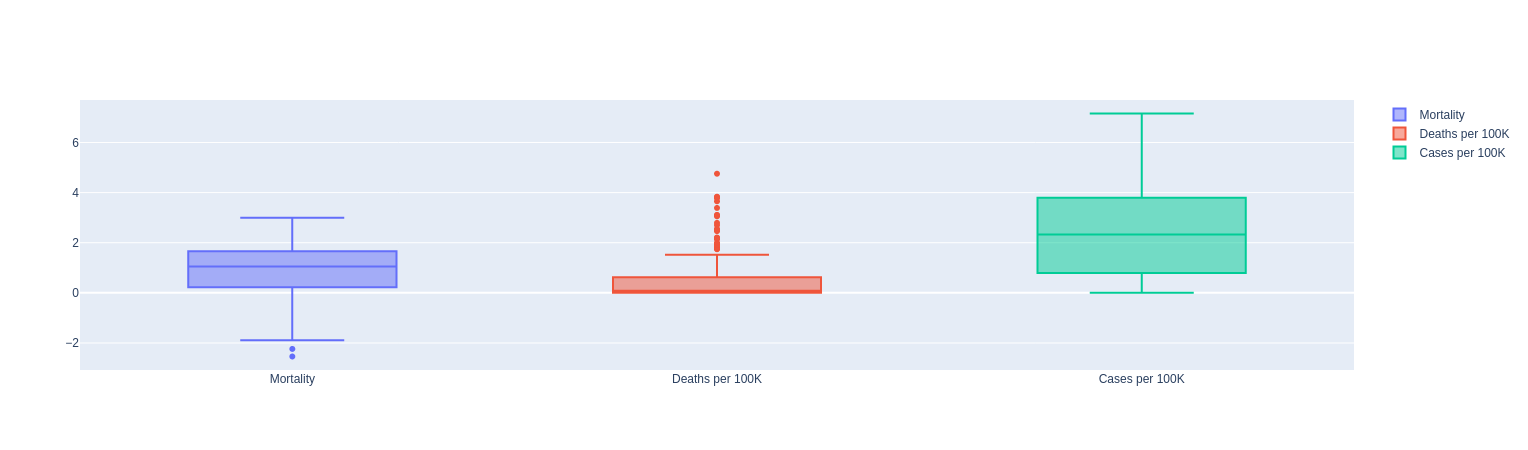

In [82]:
fig=go.Figure()
tmp = df2[df2.Date == df2.Date.max()].copy()
fig.add_trace(go.Box(y=np.log(tmp.Mort),name="Mortality"))
fig.add_trace(go.Box(y=np.log(tmp.DP100K + 1),name="Deaths per 100K"))
fig.add_trace(go.Box(y=np.log(tmp.CP100K + 1),name="Cases per 100K"))
fig.show()

In [83]:
tmp = df2.groupby("Date").agg(sum)[["Confirmed","Deaths"]].copy()

,Confirmed,Deaths
Date,,
2020-01-22,555.0,17.0
2020-01-23,654.0,18.0
2020-01-24,941.0,26.0
2020-01-25,1434.0,42.0
2020-01-26,2118.0,56.0
...,...,...
2020-04-13,1904105.0,119469.0
2020-04-14,1975458.0,125970.0
2020-04-15,2055321.0,134163.0


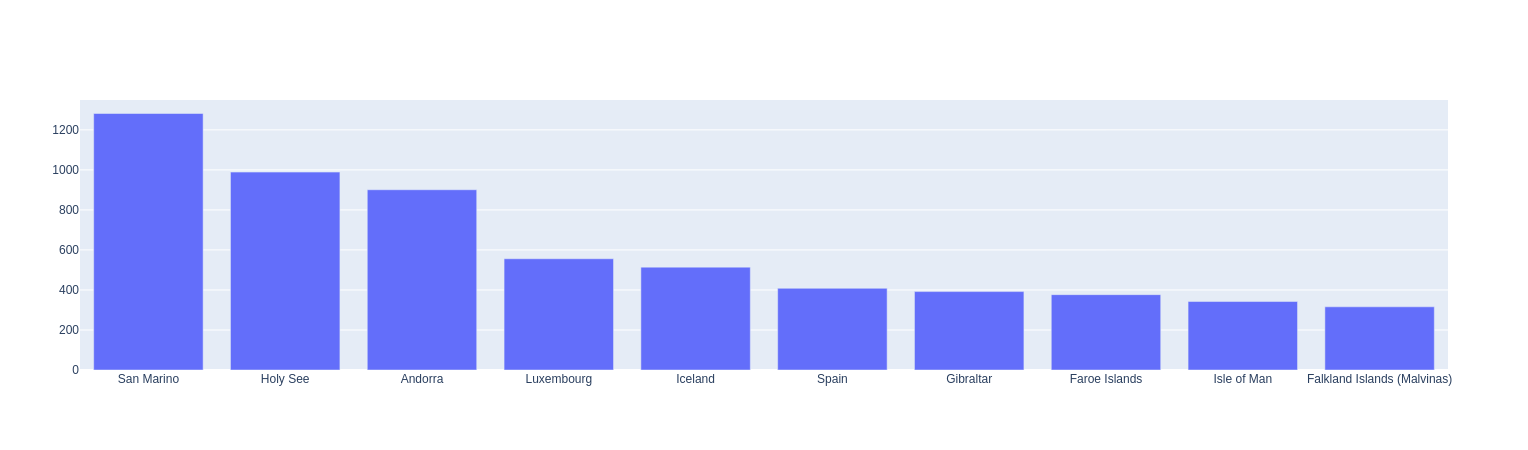

,Date,CountryRegion,ProvinceState,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,...,Combined_Key,DPM,CPM,RPM,DP100K,CP100K,RP100K,Mort,Recov,delC
18530,2020-04-17,San Marino,NaN,43.9424,12.4578,435.0,57.0,39.0,33938.0,674.0,...,San Marino,1149.154,12817.491,1679.533,114.915,1281.749,167.953,8.965517,13.103448,435.0
12179,2020-04-17,Holy See,NaN,41.9029,12.4534,8.0,2.0,0.0,809.0,336.0,...,Holy See,0.000,9888.752,2472.188,0.000,988.875,247.219,0.000000,25.000000,8.0
347,2020-04-17,Andorra,NaN,42.5063,1.5218,696.0,191.0,35.0,77265.0,20.0,...,Andorra,452.986,9007.960,2472.012,45.299,900.796,247.201,5.028736,27.442529,696.0
14528,2020-04-17,Luxembourg,NaN,49.8153,6.1296,3480.0,579.0,72.0,625976.0,442.0,...,Luxembourg,115.020,5559.319,924.956,11.502,555.932,92.496,2.068966,16.637931,3480.0
12440,2020-04-17,Iceland,NaN,64.9631,-19.0208,1754.0,1224.0,9.0,341250.0,352.0,...,Iceland,26.374,5139.927,3586.813,2.637,513.993,358.681,0.513113,69.783352,1754.0
19661,2020-04-17,Spain,NaN,40.0000,-4.0000,190839.0,74797.0,20002.0,46754783.0,724.0,...,Spain,427.806,4081.700,1599.772,42.781,408.170,159.977,10.481086,39.193771,190839.0
21923,2020-04-17,United Kingdom,Gibraltar,36.1408,-5.3536,132.0,105.0,0.0,33691.0,292.0,...,Gibraltar,0.000,3917.960,3116.559,0.000,391.796,311.656,0.000000,79.545455,132.0
8786,2020-04-17,Denmark,Faroe Islands,61.8926,-6.9118,184.0,171.0,0.0,48865.0,234.0,...,Faroe Islands,0.000,3765.476,3499.437,0.000,376.548,349.944,0.000000,92.934783,184.0
22010,2020-04-17,United Kingdom,Isle of Man,54.2361,-4.5481,291.0,169.0,4.0,85032.0,833.0,...,Isle of Man,47.041,3422.241,1987.487,4.704,342.224,198.749,1.374570,58.075601,291.0
21836,2020-04-17,United Kingdom,Falkland Islands (Malvinas),-51.7963,-59.5236,11.0,1.0,0.0,3483.0,238.0,...,Falkland Islands (Malvinas),0.000,3158.197,287.109,0.000,315.820,28.711,0.000000,9.090909,11.0


In [114]:
import string
metric = "CP100K"
tmp = df2[df2.Date == df2.Date.max()]
tmp = tmp.sort_values(by=[metric],na_position="first")[-10:]
tmp = tmp.sort_values(by=[metric],ascending=False)

tmp.Combined_Key = list(map(lambda x:x.replace("nan,",""),tmp.Combined_Key.astype(str)))
tmp.Combined_Key = list(map(lambda x: x.split(",")[0],tmp.Combined_Key))
fig = go.Figure([go.Bar(x=tmp.Combined_Key,y=tmp[metric])])
# # po.plot(fig,filename="bar1.html")
fig.show()
tmp

In [115]:
TOP10OPTIONS = [
    dict(label="Confirmed cases per 100K",value="CP100K"),
    dict(label="Total Confirmed",value="Confirmed"),
    dict(label="Deaths cases per 100K",value="DP100K"),
    dict(label="Mortality Rate",value="Mort"),
    dict(label="Total Deaths",value="Deaths")
]

In [127]:
country=["Afghanistan"]
tmp = df2[(df2.Date == df2.Date.max()) & (df2.Mort > 0)].copy()
tmp.groupby("Date").agg(sum)

,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,code3,FIPS,DPM,CPM,RPM,DP100K,CP100K,RP100K,Mort,Recov,delC
Date,,,,,,,,,,,,,,,,,,
2020-04-17,4716.709695,4599.394982,2236109.0,555155.0,153807.0,7.200097e+09,605286.0,72685.0,0.0,6158.35,119685.26,32651.07,615.83,11968.524,3265.108,829.275819,6861.802568,2218740.0


In [129]:
country = df2.CountryRegion.unique()
tmp = df2[(df2.Date == df2.Date.max()) & (df2.Mort > 0) & (df2["CountryRegion"].isin(country))].copy()
tmp = tmp.groupby(["Date"]).agg(sum)
# str(tmp.Deaths/tmp.Confirmed*100.0)
tmp

,Lat,Long,Confirmed,Recovered,Deaths,Population,UID,code3,FIPS,DPM,CPM,RPM,DP100K,CP100K,RP100K,Mort,Recov,delC
Date,,,,,,,,,,,,,,,,,,
2020-04-17,4716.709695,4599.394982,2236109.0,555155.0,153807.0,7.200097e+09,605286.0,72685.0,0.0,6158.35,119685.26,32651.07,615.83,11968.524,3265.108,829.275819,6861.802568,2218740.0
